# Regularization and Gradient Descent Exercises


## Introduction

We will begin with a short tutorial on regression, polynomial features, and regularization based on a very simple, sparse data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`. 

In [1]:
from __future__ import print_function
import os
#Create data folder and copy  "X_Y_Sinusoid_Data.csv" and "Ames_Housing_Sales.csv"
data_path = ['C:\\data']

## Question 1

* Import the data. 

* Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

* Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


In [2]:
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['X_Y_Sinusoid_Data.csv'])
data = pd.read_csv(filepath)

X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)
data

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121
5,0.289299,0.498330
6,0.342805,0.597502
7,0.345499,0.629410
8,0.386477,0.822705
9,0.430047,0.557581


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

[Text(0, 0.5, 'y data'), Text(0.5, 0, 'x data')]

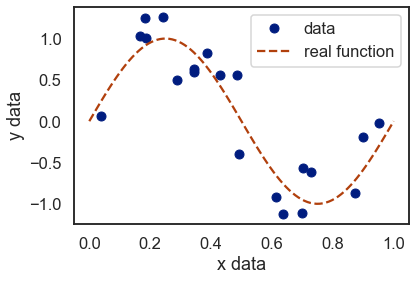

In [5]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

# Plot of the noisy (sparse)
#실제 인덱스는 x가 된다.
ax = data.set_index('x')['y'].plot(ls='', marker='o', label='data')
ax.plot(X_real, Y_real, ls='--', marker='', label='real function')

ax.legend()
ax.set(xlabel='x data', ylabel='y data')

## Question 2


* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
* Fit this data using linear regression. 
* Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.

array([[1.00000000e+00, 3.85709232e-02, 1.48771611e-03, 5.73825839e-05,
        2.21329923e-06, 8.53689947e-08, 3.29276094e-09, 1.27004829e-10,
        4.89869350e-12, 1.88947131e-13, 7.28786526e-15, 2.81099691e-16,
        1.08422746e-17, 4.18196540e-19, 1.61302266e-20, 6.22157731e-22,
        2.39971980e-23, 9.25594081e-25, 3.57010182e-26, 1.37702123e-27,
        5.31129800e-29],
       [1.00000000e+00, 1.66776347e-01, 2.78143498e-02, 4.63877563e-03,
        7.73638053e-04, 1.29024528e-04, 2.15182394e-05, 3.58873335e-06,
        5.98515837e-07, 9.98182846e-08, 1.66473288e-08, 2.77638068e-09,
        4.63034626e-10, 7.72232233e-11, 1.28790070e-11, 2.14791374e-12,
        3.58221207e-13, 5.97428241e-14, 9.96368994e-15, 1.66170781e-15,
        2.77133557e-16],
       [1.00000000e+00, 1.83152734e-01, 3.35449238e-02, 6.14384450e-03,
        1.12526192e-03, 2.06094796e-04, 3.77468253e-05, 6.91343423e-06,
        1.26621438e-06, 2.31910625e-07, 4.24750649e-08, 7.77942425e-09,
        1.4248

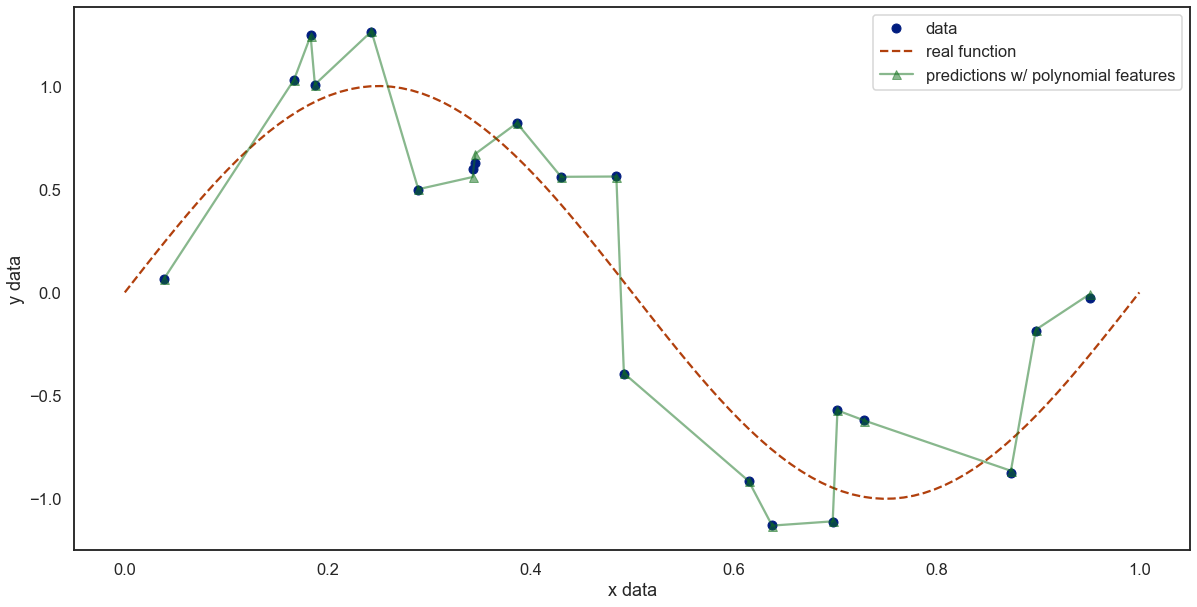

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()
#20개의 x가 계수가 됨!
X_data = pd.DataFrame(data['x'])
Y_data = data['y']

X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

plt.figure(figsize=(20, 10))
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data')

X_poly




## Question 3

* Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001). 
* Plot the results, as was done in Question 1. 
* Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude. 

What does the comparatively large magnitude of the data tell you about the role of regularization?

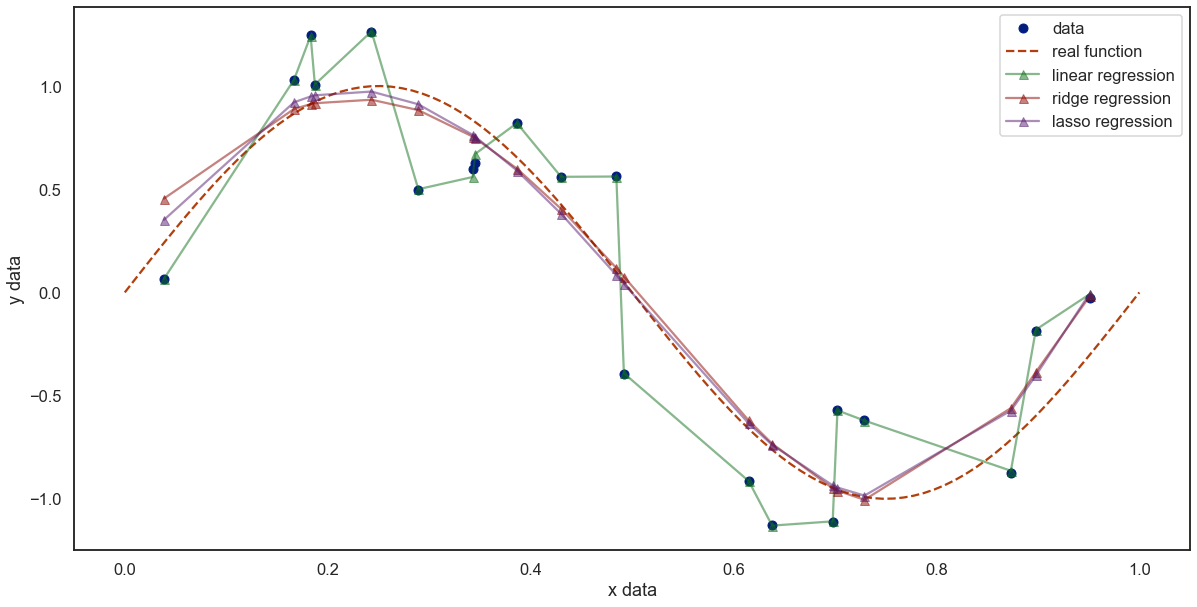

In [7]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# The ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# The plot of the predicted values
plt.figure(figsize=(20, 10))
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

## Question 4

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features.

To begin:

* Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
* Split the data into train and test sets. 
* Log transform skewed features. 
* Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.

In [8]:
filepath = os.sep.join(data_path + ['Ames_Housing_Sales.csv'])
data = pd.read_csv(filepath, sep=',')
data = data.dropna()

Create a list of categorial data and one-hot encode. Pandas one-hot encoder (`get_dummies`) works well with data that is defined as a categorical.

In [9]:
#데이터 전처리
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
#위의 변수는 모두 String의 변수들

#스트링 없에기
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])

data = pd.get_dummies(data, one_hot_encode_cols)


data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0,0,0,0,0,1,0,1,1,0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0,0,0,0,0,1,0,1,1,0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,0,0,0,0,0,1,0,1,1,0


Next, split the data in train and test data sets.

In [10]:
#트레인과 테스트 set으로 나누기
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=42)

There are a number of columns that have skewed features--a log transformation can be applied to them. Note that this includes the `SalePrice`, our predictor. However, let's keep that one as is.

In [11]:
# Create a list of float colums to check for skewing
mask = data.dtypes == np.float
float_cols = data.columns[mask]

In [13]:
skew_limit = 0.75
skew_vals = train[float_cols].skew()
#편향성 큰 것들 확인하기
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
ScreenPorch,4.599803
BsmtFinSF2,4.466378
EnclosedPorch,3.218303
LotFrontage,3.138032
MasVnrArea,2.492814


Transform all the columns where the skew is greater than 0.75, excluding "SalePrice".

In [14]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

#편향성 줄이기
for col in skew_cols.index.tolist():
    if col == "SalePrice":
        continue
    train[col] = np.log1p(train[col])
    test[col]  = test[col].apply(np.log1p)  # same thing

Separate features from predictor.

In [16]:
#테스트 트래인 나누기
feature_cols = [x for x in train.columns if x != 'SalePrice']
X_train = train[feature_cols]
y_train = train['SalePrice']

X_test  = test[feature_cols]
y_test  = test['SalePrice']

## Question 5

* Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.  


In [17]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

* Fit a basic linear regression model
* print the root-mean-squared error for this model
* plot the predicted vs actual sale price based on the model.  

In [19]:
from sklearn.linear_model import LinearRegression


linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))
#값이 306369.68...으로 나옴
print(linearRegression_rmse)

306369.68342315836


[(0.0, 582933.0),
 Text(0, 0.5, 'Predicted Price'),
 (0.0, 582933.0),
 Text(0.5, 0, 'Actual Price'),
 Text(0.5, 1.0, 'Linear Regression Results')]

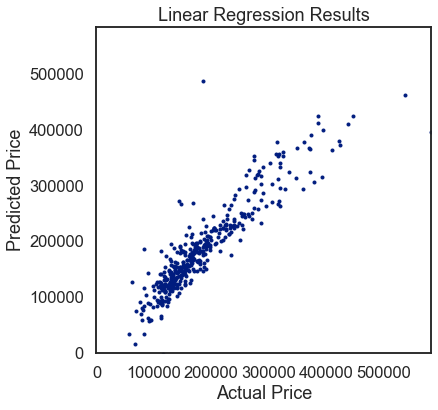

In [20]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results')

## Question 6

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

* Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
* Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
* Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.

Now for the `RidgeCV` method. It's not possible to get the alpha values for the models that weren't selected, unfortunately. The resulting error values and $\alpha$ values are very similar to those obtained above.

In [22]:
#릿지 리그레션
from sklearn.linear_model import RidgeCV
#다양한 알파에 대해서 보기
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
#cv: 크로스 발리데이션 4번
ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))
#가장 좋을 때 알파값과 그 때 모델 출력하기
print(ridgeCV.alpha_, ridgeCV_rmse)

15.0 32169.17620567248
